<a href="https://colab.research.google.com/github/matan-avitan/PythonCourse/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2

In lecture #3, we saw an example of using the pandas package, with which the can_log_short.csv file was loaded
and received the table can_table.csv.

Write an implementation (a function or several functions) that implements the continuation treatment of the data:
Fill in the missing data in columns C to L according to the following principle: Find a value in a cell that is not empty
and duplicate it backwards until the value in the next non-empty cell or until the beginning of the column

<br/>
<br/>
<br/>

First we need to upload csv
<br>
There are 2 options, upload the file directly to colab or upload it to your drive.
<br/>
<b>Option 1:</b> upload the csv file to your colab notebook in `/content` folder.
<br>
<b>Option 2:</b> mount your drive and upload the file to your colab folder in your drive
<br/>
<b><u>Important:</u></b> make sure csv name is `can_table-2.csv`
<br>


# <b> Option 1: </b>

In [26]:
import pandas as pd
import numpy as np
can_df = pd.read_csv('/content/can_table-2.csv', index_col='Unnamed: 0')
can_df

,timestamp,LatAcc,LongAcc,YawRate,SteeringAng,BrkPed,WheelVelR,WheelVelL,TrnsShft,VehSpd,ThrPstn
0,0.00,,,,-2.4375,,,,,,
1,0.05,,,,,0.392157,,,,,
2,0.10,,,,,,4.488,4.492,,,
3,0.15,0.125,-0.3125,,,,,,,,
4,0.20,,,-0.456,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...
993,49.65,,,-0.36,,,,,,,
994,49.70,,,,,,,,4,,
995,49.75,,,,,,,,,41.4375,
996,49.80,,,,-2.375,,,,,,


# <b> Option 2:</b>

In [17]:
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/drive')
can_df = pd.read_csv('/content/drive/My Drive/colab/can_table-2.csv' , index_col='Unnamed: 0')
can_df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,timestamp,LatAcc,LongAcc,YawRate,SteeringAng,BrkPed,WheelVelR,WheelVelL,TrnsShft,VehSpd,ThrPstn
0,0.00,,,,-2.4375,,,,,,
1,0.05,,,,,0.392157,,,,,
2,0.10,,,,,,4.488,4.492,,,
3,0.15,0.125,-0.3125,,,,,,,,
4,0.20,,,-0.456,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...
993,49.65,,,-0.36,,,,,,,
994,49.70,,,,,,,,4,,
995,49.75,,,,,,,,,41.4375,
996,49.80,,,,-2.375,,,,,,


# After Option 1 or 2

By checking the the Dataframe, there are missing values.<br/>
By running dtypes command, Colab print each column type. <br/>
The types of LatAcc to ThrPstn column are <u>object</u> instead of <u>float</u>

In [27]:
can_df.dtypes

timestamp      float64
LatAcc          object
LongAcc         object
YawRate         object
SteeringAng     object
BrkPed          object
WheelVelR       object
WheelVelL       object
TrnsShft        object
VehSpd          object
ThrPstn         object
dtype: object

Inforce those column. to be a numeric column

In [28]:
can_df[can_df.columns] = can_df[can_df.columns].apply(pd.to_numeric, errors='coerce')
can_df.head()

,timestamp,LatAcc,LongAcc,YawRate,SteeringAng,BrkPed,WheelVelR,WheelVelL,TrnsShft,VehSpd,ThrPstn
0,0.00,NaN,NaN,NaN,-2.4375,NaN,NaN,NaN,NaN,NaN,NaN
1,0.05,NaN,NaN,NaN,NaN,0.392157,NaN,NaN,NaN,NaN,NaN
2,0.10,NaN,NaN,NaN,NaN,NaN,4.488,4.492,NaN,NaN,NaN
3,0.15,0.125,-0.3125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.20,NaN,NaN,-0.456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These functions fill the data backward and forward based on the principle of duplicating values.
<br/>
For each column, the algorithm keeps track of the last index containing a value and its value. The process begins from the first index with the value set to None. The algorithm iterates through the column until it founds a non NaN value, it fills all the values between the last index and the current index with the found value.
<br/>
Finally, the algorithm fill remaining indices that were not handled during the iteration by filling them with the last found value.


In [29]:
def fill_column_missing_data(column: pd.Series) -> None:
  next_index_to_handle = 0
  prev_value = None
  for index, value in enumerate(column):
    if pd.notna(value):
      column.loc[next_index_to_handle:index] = value
      next_index_to_handle = index + 1
      prev_value = value
  if next_index_to_handle < len(column):
    column.loc[next_index_to_handle:] = prev_value

In [30]:
def fill_missing_data(df: pd.DataFrame):
  for column_name in df.columns[1:]:
    column = df[column_name].copy()
    fill_column_missing_data(column=column)
    df[column_name] = column

Run the function on can_df

In [31]:
fill_missing_data(df=can_df)
can_df


,timestamp,LatAcc,LongAcc,YawRate,SteeringAng,BrkPed,WheelVelR,WheelVelL,TrnsShft,VehSpd,ThrPstn
0,0.00,0.1250,-0.3125,-0.456,-2.4375,0.392157,4.488,4.492,4.0,41.578125,0.392157
1,0.05,0.1250,-0.3125,-0.456,-2.4375,0.392157,4.488,4.492,4.0,41.578125,0.392157
2,0.10,0.1250,-0.3125,-0.456,-2.4375,0.392157,4.488,4.492,4.0,41.578125,0.392157
3,0.15,0.1250,-0.3125,-0.456,-2.4375,0.392157,4.492,4.496,4.0,41.578125,0.392157
4,0.20,0.1875,-0.2500,-0.456,-2.4375,0.392157,4.492,4.496,4.0,41.578125,0.392157
...,...,...,...,...,...,...,...,...,...,...,...
993,49.65,0.1875,-0.3125,-0.360,-2.3750,0.392157,4.472,4.460,4.0,41.437500,0.392157
994,49.70,0.1875,-0.3125,-0.360,-2.3750,0.392157,4.472,4.460,4.0,41.437500,0.392157
995,49.75,0.1875,-0.3125,-0.360,-2.3750,0.392157,4.472,4.460,4.0,41.437500,0.392157
996,49.80,0.1875,-0.3125,-0.360,-2.3750,0.392157,4.472,4.460,4.0,41.437500,0.392157


<br/><br/><br/>

# Print Graph

<br/>

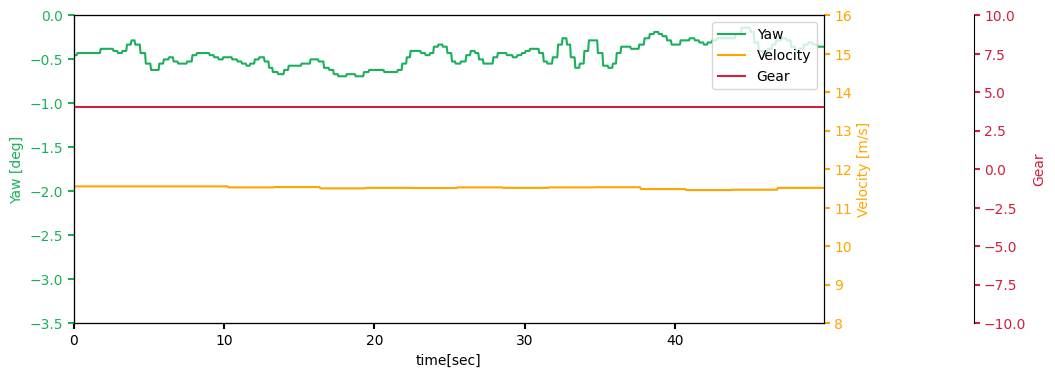

In [34]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12, 4))
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines.right.set_position(("axes", 1.2))

x = can_df.timestamp
veh_speed_in_m_to_s = can_df.VehSpd/ 3.6
p1, = ax.plot(x, can_df.YawRate, color='#1ab05b', label="Yaw")
p2, = twin1.plot(x, veh_speed_in_m_to_s, color="orange", label="Velocity")
p3, = twin2.plot(x, can_df.TrnsShft, color='#d11f3d', label="Gear")

ax.set_xlim(0, max(can_df.timestamp))
ax.set_ylim(-3.50,0.0)
twin1.set_ylim(8, 16)
twin2.set_ylim(-10.0, 10.0)

ax.set_xlabel("time[sec]")
ax.set_ylabel("Yaw [deg]")
twin1.set_ylabel("Velocity [m/s]")
twin2.set_ylabel("Gear")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)


# Change legend position to top right
ax.legend(handles=[p1, p2, p3], loc='upper right')
plt.show()